# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Reza Ubaidillah
- Email: muhammadrezaubaidillah15@gmail.com
- Id Dicoding: rezaubaidillah

## Persiapan

### Menyiapkan library yang dibutuhkan

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
import joblib
from sklearn.tree import DecisionTreeClassifier

In [107]:
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

In [108]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Institusi Pendidikan/student_performance.csv', delimiter=';')

## Data Understanding

In [109]:
data.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [110]:
# Informasi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [111]:
# Statistik deskriptif
print(data.describe())

       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

In [112]:
# Distribusi variabel target
print(data['Status'].value_counts())

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


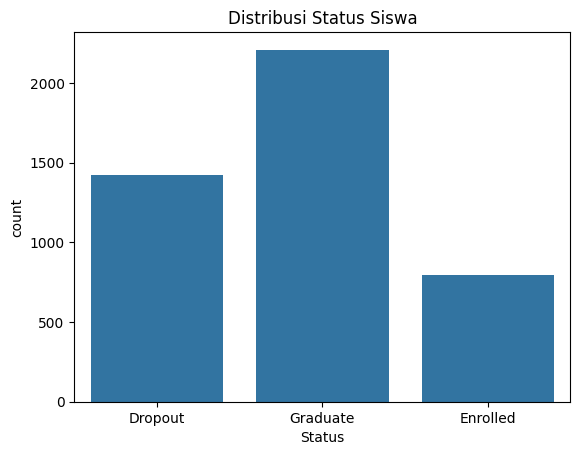

In [113]:
# Visualisasi distribusi Status
sns.countplot(x='Status', data=data)
plt.title('Distribusi Status Siswa')
plt.show()

## Data Preparation / Preprocessing

In [114]:
# Melihat baris dengan nilai yang hilang
print(data.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [115]:
# Melihat baris dengan nilai yang sama
print(data.duplicated().sum())


0


In [116]:
print(data.nunique())

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

In [117]:
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

In [118]:
data = data[data['Status'] != 1]
data = data.reset_index(drop=True)

data.loc[:, 'Status'] = data['Status'].replace({2: 1})
data

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [119]:
data['Status'].value_counts()

,count
Status,
1,2209
0,1421


In [120]:
data_feature_corr = data.loc[:, data.corr()['Status'].abs().ge(0.1)]
data_feature_corr

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [121]:
data_feature_corr.to_csv('student_feature_corr.csv', index=False)

In [122]:
from google.colab import files
files.download('student_feature_corr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
X = data_feature_corr.drop('Status', axis=1)
y = data_feature_corr['Status']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [125]:
# Cek distribusi kelas sebelum resampling
print(y_train.value_counts())

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah resampling
print(y_train_resampled.value_counts())

Status
1    1767
0    1137
Name: count, dtype: int64
Status
1    1767
0    1767
Name: count, dtype: int64


In [126]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

## Modeling

### Logistic Regression

In [127]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9118457300275482
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       284
           1       0.91      0.95      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



### Decision Tree

In [128]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8608815426997245
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       284
           1       0.88      0.89      0.89       442

    accuracy                           0.86       726
   macro avg       0.86      0.85      0.85       726
weighted avg       0.86      0.86      0.86       726



### Random Forest

In [129]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.918732782369146
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       284
           1       0.90      0.98      0.94       442

    accuracy                           0.92       726
   macro avg       0.93      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



## Evaluation

In [130]:
y_pred = logreg.predict(X_test)

In [131]:
y_pred = logreg.predict(X_train_resampled)

Accuracy on Test Set: 0.9111488398415394

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1767
           1       0.89      0.94      0.91      1767

    accuracy                           0.91      3534
   macro avg       0.91      0.91      0.91      3534
weighted avg       0.91      0.91      0.91      3534



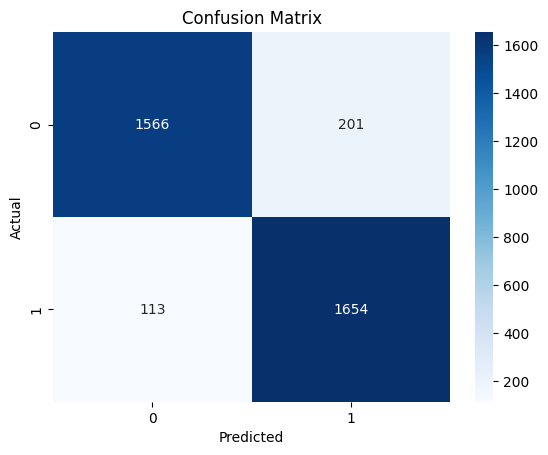

In [132]:
# Calculate accuracy
accuracy = accuracy_score(y_train_resampled, y_pred)
print("Accuracy on Test Set:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_train_resampled, y_pred))

# Confusion matrix
cm = confusion_matrix(y_train_resampled, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy on Test Set: 0.9118457300275482

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       284
           1       0.91      0.95      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



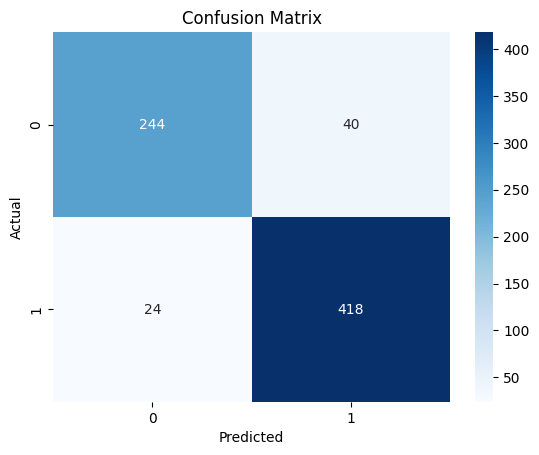

In [133]:
y_pred = logreg.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Hyperparameter Tuning

In [134]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000]
}

In [135]:
logreg = LogisticRegression(random_state=42)

In [136]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

In [137]:
# Fit GridSearchCV on resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'], 'max_iter': [1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1_weighted', verbose=1)

In [138]:
# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1-Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation F1-Score: 0.9081491107474602


Test Set Accuracy: 0.9104683195592287

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       284
           1       0.91      0.94      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



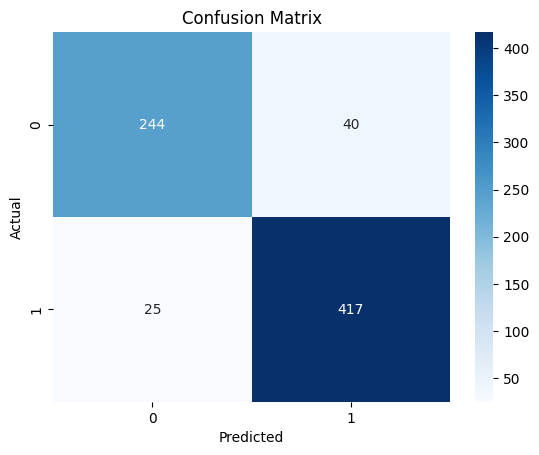

In [139]:
# Get the best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [140]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.coef_[0],
    'Abs_Coefficient': abs(best_model.coef_[0])
})
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print("Top 10 Features by Coefficient:")
print(coefficients.head(10))

Top 10 Features by Coefficient:
                              Feature  Coefficient  Abs_Coefficient
15  Curricular_units_2nd_sem_approved     3.308989         3.308989
13  Curricular_units_2nd_sem_enrolled    -1.856009         1.856009
11  Curricular_units_1st_sem_approved     1.672144         1.672144
6             Tuition_fees_up_to_date     1.157204         1.157204
10  Curricular_units_1st_sem_enrolled    -1.079026         1.079026
16     Curricular_units_2nd_sem_grade     0.755017         0.755017
8                  Scholarship_holder     0.399013         0.399013
5                              Debtor    -0.230852         0.230852
0                      Marital_status     0.160083         0.160083
12     Curricular_units_1st_sem_grade    -0.155707         0.155707


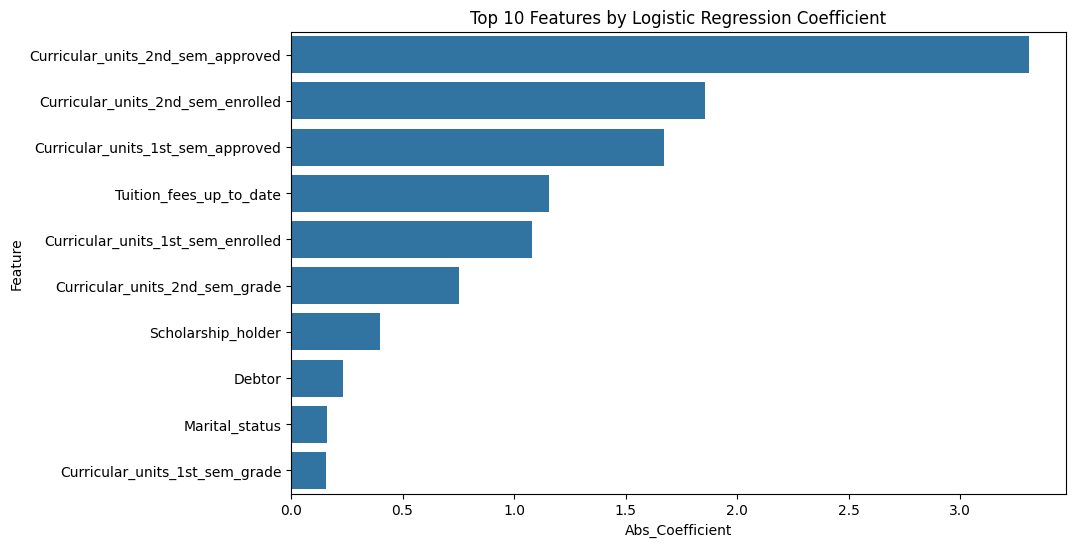

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coefficients.head(10))
plt.title('Top 10 Features by Logistic Regression Coefficient')
plt.show()

## Saving Model

In [142]:
joblib.dump(best_model, 'model.joblib')

['model.joblib']

In [143]:
from google.colab import files
files.download('model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [144]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Institusi Pendidikan" --scan-notebooks